In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
data = pd.read_csv(r"D:\Games\animanga\coding\heart\heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
data.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


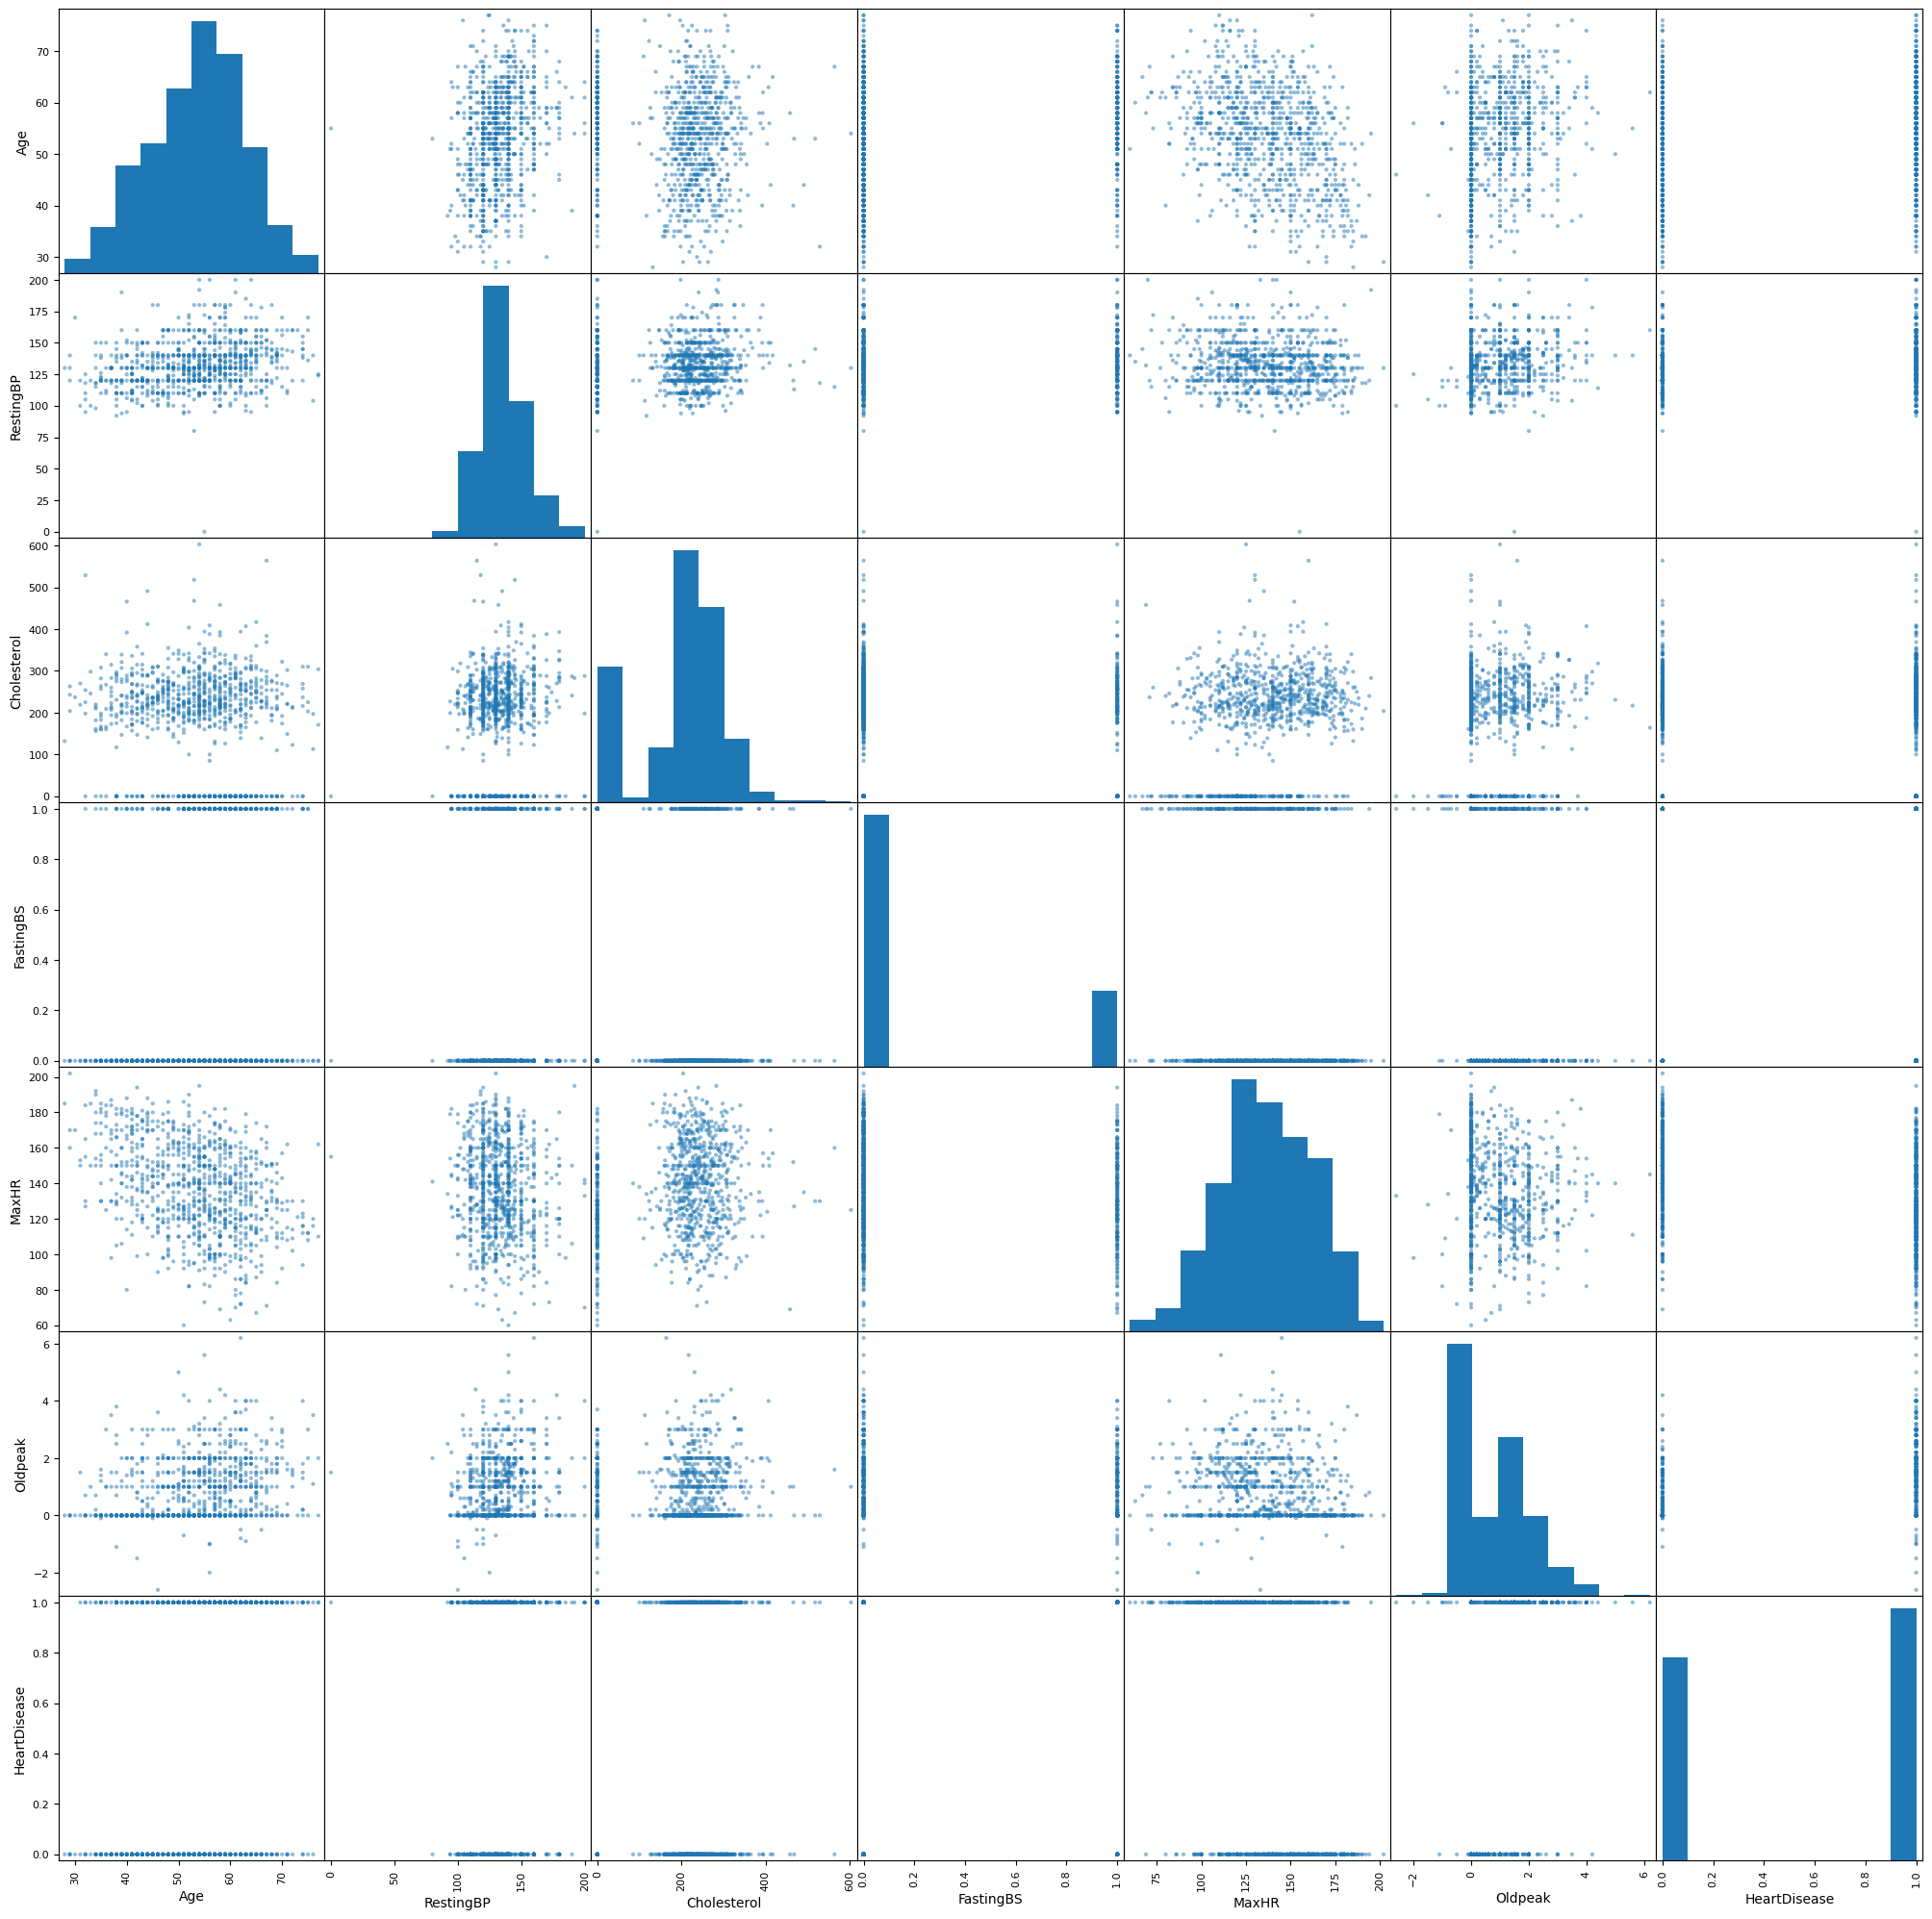

In [8]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(data,figsize=(25, 25))

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Sex'] = lb.fit_transform(data['Sex'])
data['ChestPainType'] = lb.fit_transform(data['ChestPainType'])
data['RestingECG'] = lb.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = lb.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = lb.fit_transform(data['ST_Slope'])

In [13]:
y = pd.DataFrame(data['HeartDisease'])
X = pd.DataFrame(data, columns = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina'	,'Oldpeak',	'ST_Slope'])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
testing_score = []
training_score = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    training_score.append(knn.score(X_train,y_train))
    testing_score.append(knn.score(X_test,y_test))

C:\Users\rauna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rauna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rauna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rauna\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [16]:
max_training_score = max(training_score)
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]
print('Max training score {} % and k = {}'.format(max_training_score*100,list(map(lambda x: x+1, train_scores_ind))))



Max training score 100.0 % and k = [1]


In [17]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: x+1, test_scores_ind)))) 

Max testing score 73.8562091503268 % and k = [11]


In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)


C:\Users\rauna\AppData\Local\Temp\ipykernel_10868\3226501391.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8725490196078431


In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)


C:\Users\rauna\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rauna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred2 = lr.predict(X_test)

In [27]:
print(accuracy_score(y_test, y_pred2))

0.8660130718954249
